In [1]:
import numpy as np
import pandas as pd
import stan
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('/mrhome/amingk/Documents/7TPD/ActStimRL')
from Madule import utils
import arviz as az
from scipy.stats import gaussian_kde

In [2]:
def MAP(posterior_samples):
    # Estimate density
    kde = gaussian_kde(posterior_samples)

    # Evaluate KDE on a grid
    x = np.linspace(min(posterior_samples), max(posterior_samples), 1000)
    density = kde(x)

    # MAP estimate = location of the maximum density
    map_estimate = x[np.argmax(density)]
    return map_estimate

In [3]:
# wirtten main directory  
writeMainScarch = '/mnt/scratch/projects/7TPD/amin'
# name of model
model_name = 'tabel2_model1'
# The adrees name of pickle file
pickelDir_HC = f'{writeMainScarch}/Behavioral/Tabel3/HC/{model_name}_HC.pkl'
# pickle file in the scratch folder in PD
pickelDir_PD = f'{writeMainScarch}/Behavioral/Tabel3/PD/{model_name}_PD.pkl'
"""Loading the pickle file of model fit from the subject directory"""
loadPkl_HC = utils.load_pickle(load_path=pickelDir_HC)
loadPkl_PD = utils.load_pickle(load_path=pickelDir_PD)
fit_HC = loadPkl_HC['fit']
fit_PD = loadPkl_PD['fit']

In [4]:
#####################Hierarchical Parameters
# Healthy Control
transfer_hier_alphaAct_pos_mu_HC = fit_HC["transfer_hier_alphaAct_pos_mu"] 
transfer_hier_alphaAct_neg_mu_HC = fit_HC["transfer_hier_alphaAct_neg_mu"] 
transfer_hier_alphaClr_pos_mu_HC = fit_HC["transfer_hier_alphaClr_pos_mu"] 
transfer_hier_alphaClr_neg_mu_HC = fit_HC["transfer_hier_alphaClr_neg_mu"] 
transfer_hier_weight_mu_HC = fit_HC["transfer_hier_weight_mu"] 
transfer_hier_sensitivity_mu_HC = fit_HC["transfer_hier_sensitivity_mu"]

# Parkinson's disease
transfer_hier_alphaAct_pos_mu_PD = fit_PD["transfer_hier_alphaAct_pos_mu"] 
transfer_hier_alphaAct_neg_mu_PD = fit_PD["transfer_hier_alphaAct_neg_mu"] 
transfer_hier_alphaClr_pos_mu_PD = fit_PD["transfer_hier_alphaClr_pos_mu"] 
transfer_hier_alphaClr_neg_mu_PD = fit_PD["transfer_hier_alphaClr_neg_mu"] 
transfer_hier_weight_mu_PD = fit_PD["transfer_hier_weight_mu"] 
transfer_hier_sensitivity_mu_PD = fit_PD["transfer_hier_sensitivity_mu"]


In [5]:
####################################Individual Parameters

# Healthy Control
transfer_weight_HC=fit_HC['transfer_weight']
transfer_alphaAct_pos_HC=fit_HC['transfer_alphaAct_pos']
transfer_alphaAct_neg_HC=fit_HC['transfer_alphaAct_neg']
transfer_alphaClr_pos_HC=fit_HC['transfer_alphaClr_pos']
transfer_alphaClr_neg_HC=fit_HC['transfer_alphaClr_neg']
transfer_sensitivity_HC=fit_HC['transfer_sensitivity']

# Healthy Control
transfer_weight_PD=fit_PD['transfer_weight']
transfer_alphaAct_pos_PD=fit_PD['transfer_alphaAct_pos']
transfer_alphaAct_neg_PD=fit_PD['transfer_alphaAct_neg']
transfer_alphaClr_pos_PD=fit_PD['transfer_alphaClr_pos']
transfer_alphaClr_neg_PD=fit_PD['transfer_alphaClr_neg']
transfer_sensitivity_PD=fit_PD['transfer_sensitivity']



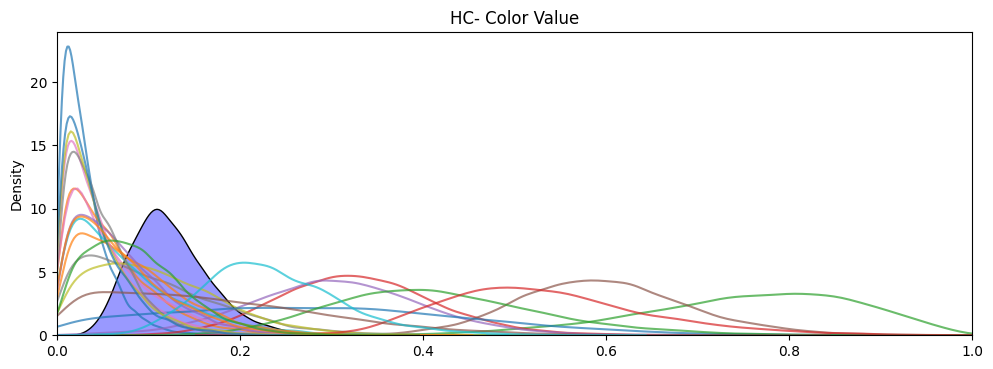

In [ ]:
mm = 1/2.54  # centimeters in inches
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(30*mm, 10*mm))
#axs = axs.flatten()

############ Healthy Control

# positive learning rate of action value in Color condition
for i in range(transfer_weight_HC.shape[0]):
    sns.kdeplot(data=transfer_weight_HC[i,1], ax=axs, alpha=.7)
    

# hierarchical parametes
sns.kdeplot(data=transfer_hier_weight_mu_HC[1], ax=axs, multiple="stack", color='blue', alpha=.4)


axs.set_xlim(0,1)
axs.set_title('HC- Color Value')

fig.subplots_adjust(wspace=.3, hspace=.3)


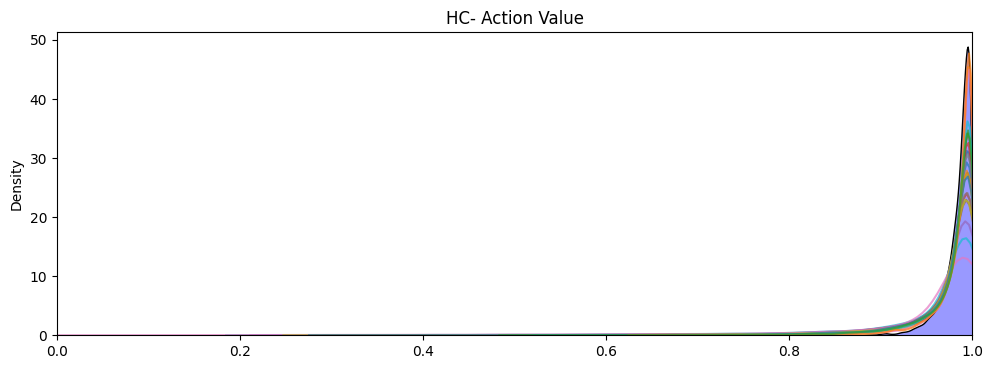

In [6]:
mm = 1/2.54  # centimeters in inches
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(30*mm, 10*mm))
#axs = axs.flatten()

############ Healthy Control

# positive learning rate of action value in Color condition
for i in range(transfer_weight_HC.shape[0]):
    sns.kdeplot(data=transfer_weight_HC[i,0], ax=axs, alpha=.7)

# hierarchical parametes
sns.kdeplot(data=transfer_hier_weight_mu_HC[0], ax=axs, multiple="stack", color='blue', alpha=.4)


axs.set_xlim(0,1)
axs.set_title('HC- Action Value')

fig.subplots_adjust(wspace=.3, hspace=.3)


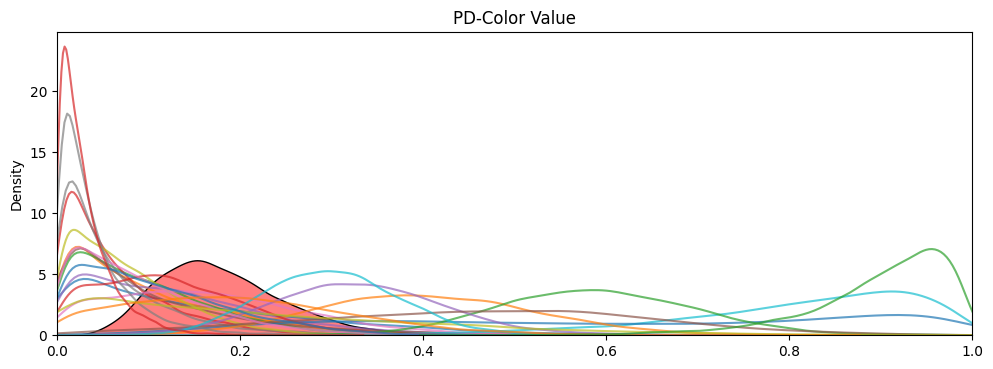

In [7]:
mm = 1/2.54  # centimeters in inches
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(30*mm, 10*mm))
#axs = axs.flatten()

############ Healthy Control

# positive learning rate of action value in Color condition
for i in range(transfer_weight_PD.shape[0]):
    sns.kdeplot(data=transfer_weight_PD[i,1], ax=axs, alpha=.7)

# hierarchical parametes
sns.kdeplot(data=transfer_hier_weight_mu_PD[1], ax=axs, multiple="stack", color='red', alpha=.5)


axs.set_xlim(0,1)
axs.set_title('PD-Color Value')

fig.subplots_adjust(wspace=.3, hspace=.3)


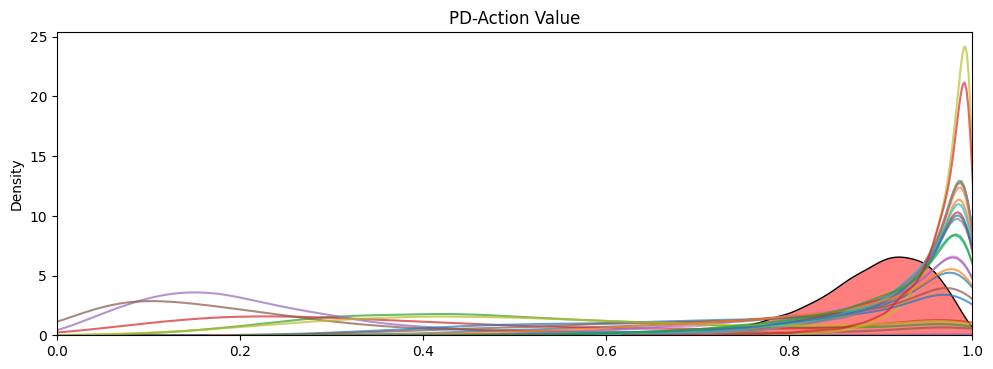

In [8]:
mm = 1/2.54  # centimeters in inches
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(30*mm, 10*mm))
#axs = axs.flatten()

############ Healthy Control

# positive learning rate of action value in Color condition
for i in range(transfer_weight_PD.shape[0]):
    sns.kdeplot(data=transfer_weight_PD[i,0], ax=axs, alpha=.7)

# hierarchical parametes
sns.kdeplot(data=transfer_hier_weight_mu_PD[0], ax=axs, multiple="stack", color='red', alpha=.5)


axs.set_xlim(0,1)
axs.set_title('PD-Action Value')

fig.subplots_adjust(wspace=.3, hspace=.3)


In [8]:
# Read data fram of participatns
df = pd.read_csv('/mnt/projects/7TPD/bids/derivatives/fMRI_DA/AllBehData/NoNanOutlierBehAll.csv')


In [20]:
#Outlier of weighting Parameters for HC -Color Value
for i in range(len(transfer_weight_HC)):
    if MAP(transfer_weight_HC[i,1])>.6:
        print(i, ': ', df[df['patient']=='HC']['sub_ID'].unique()[i])

2 :  sub-030


In [ ]:
#Outlier of weighting Parameters for HC -Action Value
for i in range(len(transfer_weight_HC)):
    if MAP(transfer_weight_HC[i,0])<.4:
        print(i, ': ', df[df['patient']=='PD']['sub_ID'].unique()[i])

In [23]:
#Outlier of weighting Parameters for PD -Color Value
for i in range(len(transfer_weight_PD)):
    if MAP(transfer_weight_PD[i,1])>.6:
        print(i, ': ', df[df['patient']=='PD']['sub_ID'].unique()[i])

9 :  sub-052
10 :  sub-056
22 :  sub-108


In [24]:
#Outlier of weighting Parameters for PD -Action Value
for i in range(len(transfer_weight_PD)):
    if MAP(transfer_weight_PD[i,0])<.4:
        print(i, ': ', df[df['patient']=='PD']['sub_ID'].unique()[i])

3 :  sub-025
4 :  sub-029
5 :  sub-040
